In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
working_dir = r'./gdrive/My Drive/Semester7/MachineLearning/MLProject/'
print(working_dir)

./gdrive/My Drive/Semester7/MachineLearning/MLProject/


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 18)

train_data_path = working_dir + r'train.csv'
train_df = pd.read_csv(train_data_path, sep=",")
print(train_df.shape)
print(train_df.head())
# print(train_df.tail())

(17176, 14)
      tripid  additional_fare  duration  meter_waiting  meter_waiting_fare  \
0  189123628             10.5     834.0           56.0              0.0000   
1  189125358             10.5     791.0           47.0              0.0000   
2  189125719             10.5    1087.0           80.0              0.0000   
3  189127273             10.5     598.0          271.0             15.6638   
4  189128020              NaN       NaN            NaN                 NaN   

   meter_waiting_till_pickup     pickup_time       drop_time  pick_lat  \
0                       64.0  11/1/2019 0:20  11/1/2019 0:34   6.86252   
1                      134.0  11/1/2019 0:56  11/1/2019 1:09   6.88589   
2                       61.0  11/1/2019 1:08  11/1/2019 1:26   6.90839   
3                       68.0  11/1/2019 2:27  11/1/2019 2:37   6.92570   
4                        NaN  11/1/2019 3:34  11/1/2019 3:51   6.87441   

   pick_lon  drop_lat  drop_lon    fare    label  
0   79.8993   6.90330  

In [0]:
for colname in train_df.columns: 
    print('NaN count of ', colname, ' is ', sum(pd.isnull(train_df[colname])))

NaN count of  tripid  is  0
NaN count of  additional_fare  is  202
NaN count of  duration  is  202
NaN count of  meter_waiting  is  202
NaN count of  meter_waiting_fare  is  202
NaN count of  meter_waiting_till_pickup  is  202
NaN count of  pickup_time  is  0
NaN count of  drop_time  is  0
NaN count of  pick_lat  is  0
NaN count of  pick_lon  is  0
NaN count of  drop_lat  is  0
NaN count of  drop_lon  is  0
NaN count of  fare  is  137
NaN count of  label  is  0


In [4]:
from sklearn.utils import shuffle
train_df = shuffle(train_df)
print(train_df.shape)
print(train_df.head())
train_df.reset_index(drop=True, inplace=True)
print(train_df.head())

(17176, 14)
          tripid  additional_fare  duration  meter_waiting  \
11471  206150765             40.5     287.0            9.0   
5215   196510728             10.5    1202.0           84.0   
2751   192263732             10.5    1103.0          320.0   
5721   197230753             10.5     622.0          119.0   
11835  206885033             10.5    1073.0          498.0   

       meter_waiting_fare  meter_waiting_till_pickup       pickup_time  \
11471            0.000000                      187.0    1/1/2020 20:07   
5215             0.000000                       94.0   11/30/2019 0:52   
2751             0.000000                      277.0  11/15/2019 18:23   
5721             0.000000                       93.0   12/2/2019 15:54   
11835           28.817948                      210.0    1/3/2020 22:44   

              drop_time  pick_lat  pick_lon  drop_lat  drop_lon    fare  \
11471    1/1/2020 20:12   7.30749   80.6347   7.31643   80.6407  136.78   
5215    11/30/2019 1

In [0]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def ScaleData(df, column_name, log_scale=False, divider=10):
  temp = df.get(column_name).to_numpy()
  if log_scale:
    transformer = FunctionTransformer(np.log1p)
    temp = transformer.transform(temp)
    temp /= 20
  else:
    temp /= divider
  # print(np.nanmax(temp))
  temp = pd.DataFrame({column_name: temp})

  return temp

# fares = ScaleData(train_df, 'fare', log_scale=True)
# fares.hist(column='fare')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc9c239438>]],
      dtype=object)

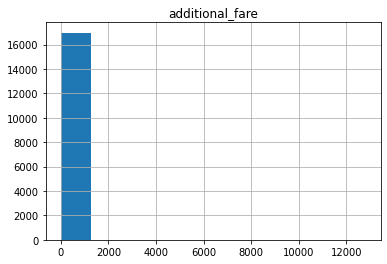

In [0]:
# durations = train_df.get('duration').to_numpy()
# print(np.nanmax(additional_fares))
# additional_fares /= 1000
additional_fares = train_df.get('additional_fare').to_numpy()
additional_fares = pd.DataFrame({'additional_fare': additional_fares})

additional_fares.hist(column='additional_fare')

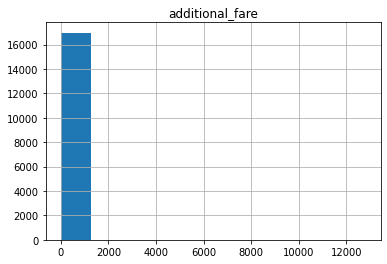

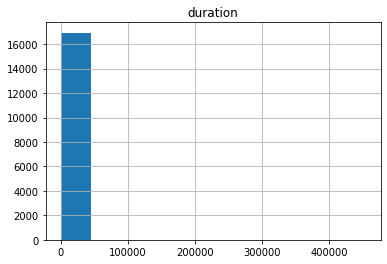

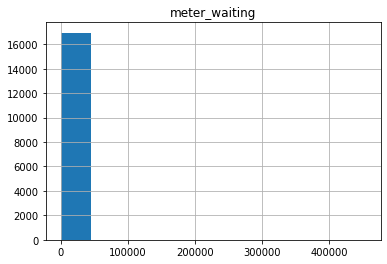

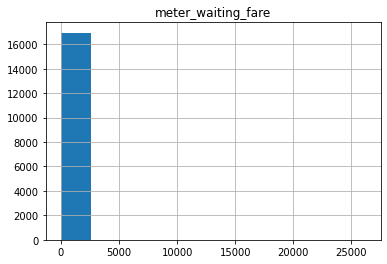

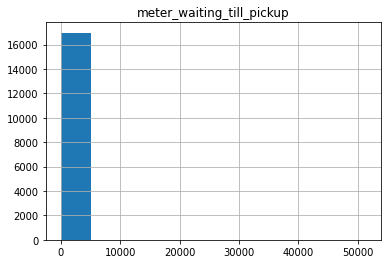

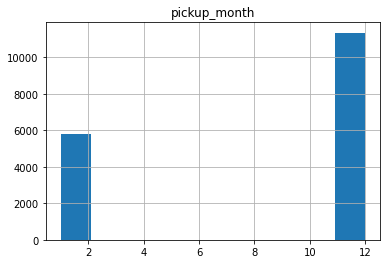

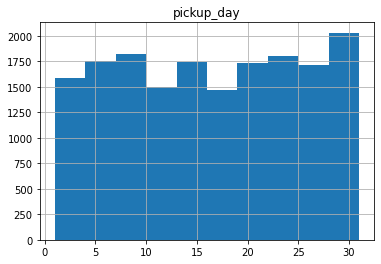

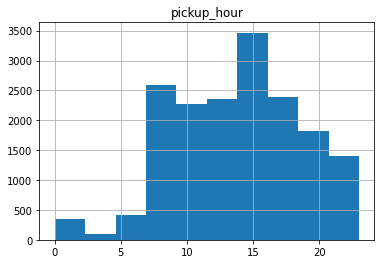

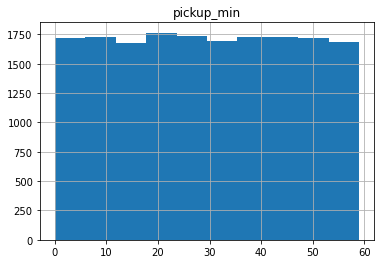

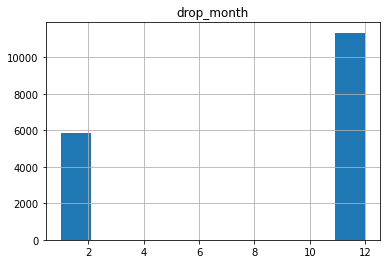

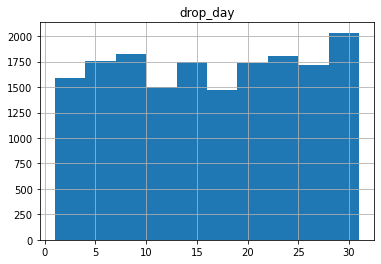

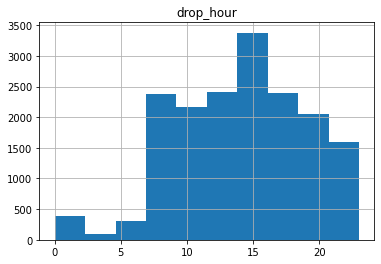

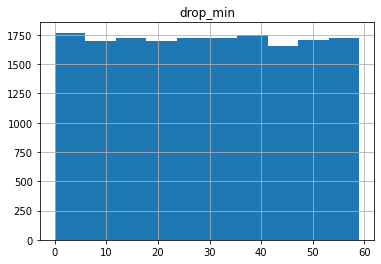

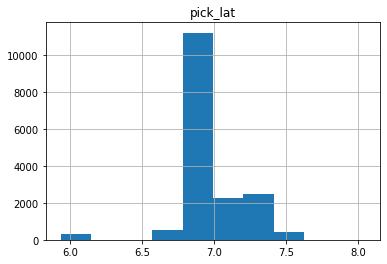

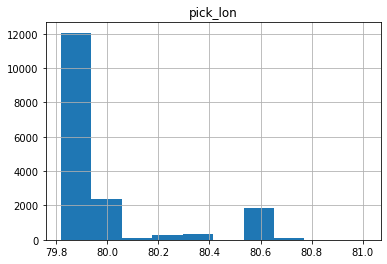

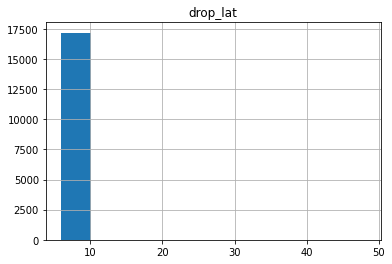

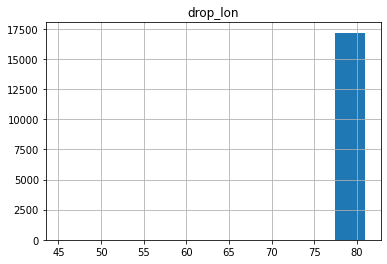

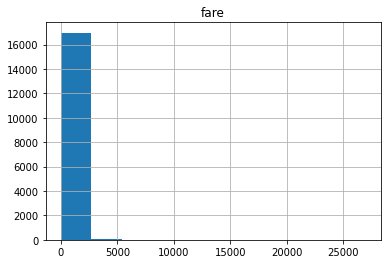

In [0]:
x, yy = GetXY(train_df, needY = True)

for col in x.columns:
  temp =  x.get(col).to_numpy()
  temp = pd.DataFrame({col: temp})
  temp = temp.dropna()
  temp.hist(column=col)

In [0]:
durations = train_df.get('meter_waiting').to_numpy()
transformer = FunctionTransformer(np.log1p)
durations = transformer.transform(durations)
print(np.nanmax(durations))
# durations = pd.DataFrame({'duration': durations})
# durations.hist(column='duration')

In [0]:
pick_lats = ScaleData(train_df, 'pick_lon', divider=100)
pick_lats.hist(column='pick_lon')

In [5]:
from datetime import datetime

# datetime_str = '09/19/18 13:55:26'
datetime_str = '11/1/2019 0:20'

# datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
datetime_object = datetime.strptime(datetime_str, '%m/%d/20%y %H:%M')

print(type(datetime_object))
print(datetime_object)  # printed in default format
print(datetime_object.month)
print(datetime_object.day)
print(datetime_object.hour)
print(datetime_object.minute)

<class 'datetime.datetime'>
2019-11-01 00:20:00
11
1
0
20


In [0]:
pickup_times = train_df.get('pickup_time').values.tolist()
pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
for pickup_time in pickup_times:
  temp['pickup_month'].append(pickup_time.month)
  temp['pickup_day'].append(pickup_time.day)
  temp['pickup_hour'].append(pickup_time.hour)
  temp['pickup_min'].append(pickup_time.minute)
pickup_times = pd.DataFrame(temp)
pickup_times.head()

,pickup_month,pickup_day,pickup_hour,pickup_min
0,11,1,0,1
1,11,1,0,1
2,11,1,1,1
3,11,1,2,1
4,11,1,3,1


In [0]:
pickup_times = train_df.get('pickup_time').values.tolist()
pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
for pickup_time in pickup_times:
  temp['pickup_month'].append(pickup_time.month / 12.0)
  temp['pickup_day'].append(pickup_time.day / 31.0)
  temp['pickup_hour'].append(pickup_time.hour / 24.0)
  temp['pickup_min'].append(pickup_time.minute / 60.0)
pickup_times = pd.DataFrame(temp)
pickup_times.head()

,pickup_month,pickup_day,pickup_hour,pickup_min
0,0.916667,0.032258,0.000000,0.333333
1,0.916667,0.032258,0.000000,0.933333
2,0.916667,0.032258,0.041667,0.133333
3,0.916667,0.032258,0.083333,0.450000
4,0.916667,0.032258,0.125000,0.566667


In [0]:
# month, day, year
time_stamp = '11/1/2019 0:20'

def GiveDayAndTime(time_stamp):
  time_stamp = time_stamp.split(' ')
  date = time_stamp[0].split('/')
  day_of_year = (30 * int(date[0])) + int(date[1])
  day_of_year /= 360

  time = time_stamp[1].split(':')
  min_of_day = (60 * int(time[0])) + int(time[1])
  min_of_day /= 1500

  return day_of_year, min_of_day

# print(GiveDayAndTime(time_stamp))

In [0]:
pick_lats = train_df.get('pick_lat').to_numpy()
pick_lons = train_df.get('pick_lon').to_numpy()

drop_lats = train_df.get('drop_lat').to_numpy()
drop_lons = train_df.get('drop_lon').to_numpy()

distances = np.hypot((pick_lats - drop_lats), (pick_lons - drop_lons))

distances = pd.DataFrame({'distance': distances})

In [0]:
import sklearn
import numpy as np

def GetXY(df, needY = True):
  if needY:
    X1 = df.drop(labels=['tripid', 'label', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'], axis=1)
    X2 = df.drop(labels=['tripid', 'label', 'pickup_time', 'drop_time', 'meter_waiting_till_pickup', 'additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare'], axis=1)
  else:
    X1 = df.drop(labels=['tripid', 'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare'], axis=1)
    X2 = df.drop(labels=['tripid', 'pickup_time', 'drop_time', 'meter_waiting_till_pickup', 'additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare'], axis=1)
  # X_temp = df[['pickup_time']]
  # X_temp = X_temp.copy()

  # temp_data = {'day_of_year': [], 'min_of_day': []}
  # rows, _ = X_temp.shape

  # for row in range(rows):
  #  temp_ts = X_temp.loc[row].to_string().split('    ')
  #  temp_ts = GiveDayAndTime(temp_ts[1])
  #  temp_data['day_of_year'].append(temp_ts[0])
  #  temp_data['min_of_day'].append(temp_ts[1])

  # temp_data = pd.DataFrame.from_dict(temp_data)

  # X.reset_index(drop=True, inplace=True)
  # temp_data.reset_index(drop=True, inplace=True)
  # X = pd.concat([X, temp_data], axis=1)
  # pick_lats = train_df.get('pick_lat').to_numpy()
  # pick_lons = train_df.get('pick_lon').to_numpy()

  # drop_lats = train_df.get('drop_lat').to_numpy()
  # drop_lons = train_df.get('drop_lon').to_numpy()

  # distances = np.hypot((pick_lats - drop_lats), (pick_lons - drop_lons))

  # distances = pd.DataFrame({'distance': distances})
  # X.reset_index(drop=True, inplace=True)
  # distances.reset_index(drop=True, inplace=True)
  # X = pd.concat([X, distances], axis=1)
  pickup_times = train_df.get('pickup_time').values.tolist()
  pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
  temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
  for pickup_time in pickup_times:
    temp['pickup_month'].append(pickup_time.month)
    temp['pickup_day'].append(pickup_time.day)
    temp['pickup_hour'].append(pickup_time.hour)
    temp['pickup_min'].append(pickup_time.minute)
  pickup_times = pd.DataFrame(temp)

  drop_times = train_df.get('drop_time').values.tolist()
  drop_times = [datetime.strptime(drop_time, '%m/%d/20%y %H:%M') for drop_time in drop_times]
  temp = {'drop_month': [], 'drop_day': [], 'drop_hour': [], 'drop_min': []}
  for drop_time in drop_times:
    temp['drop_month'].append(drop_time.month)
    temp['drop_day'].append(drop_time.day)
    temp['drop_hour'].append(drop_time.hour)
    temp['drop_min'].append(drop_time.minute)
  drop_times = pd.DataFrame(temp)

  X1.reset_index(drop=True, inplace=True)
  pickup_times.reset_index(drop=True, inplace=True)
  drop_times.reset_index(drop=True, inplace=True)
  X2.reset_index(drop=True, inplace=True)

  X = pd.concat([X1, pickup_times, drop_times, X2], axis=1)

  if needY:
    Y = df["label"]
    col = pd.Categorical(Y, ['incorrect', 'correct'])
    Y = pd.Series(col.codes)
    return X, Y
  else:
    return X

In [0]:
import sklearn
import numpy as np

def GetXY_v2(df, needY = True):
  additional_fares = ScaleData(df, 'additional_fare', log_scale=True)
  durations = ScaleData(df, 'duration', log_scale=True)
  meter_waitings = ScaleData(df, 'meter_waiting', log_scale=True)
  meter_waiting_fares = ScaleData(df, 'meter_waiting_fare', log_scale=True)
  meter_waiting_till_pickups = ScaleData(df, 'meter_waiting_till_pickup', log_scale=True)
  pick_lats = ScaleData(df, 'pick_lat')
  pick_lons = ScaleData(df, 'pick_lon', divider=100)
  drop_lats = ScaleData(df, 'drop_lat')
  drop_lons = ScaleData(df, 'drop_lon', divider=100)
  fares = ScaleData(df, 'fare', log_scale=True)

  # pickup_times = df.get('pickup_time').values.tolist()
  # pickup_times = [GiveDayAndTime(pickup_time) for pickup_time in pickup_times]
  # pickup_times = {'day_of_year': [pickup_time[0] for pickup_time in pickup_times], 'min_of_day': [pickup_time[1] for pickup_time in pickup_times]}
  # pickup_times = pd.DataFrame(pickup_times)
  # print(pickup_times)
  pickup_times = train_df.get('pickup_time').values.tolist()
  pickup_times = [datetime.strptime(pickup_time, '%m/%d/20%y %H:%M') for pickup_time in pickup_times]
  temp = {'pickup_month': [], 'pickup_day': [], 'pickup_hour': [], 'pickup_min': []}
  for pickup_time in pickup_times:
    temp['pickup_month'].append(pickup_time.month / 12.0)
    temp['pickup_day'].append(pickup_time.day / 31.0)
    temp['pickup_hour'].append(pickup_time.hour / 24.0)
    temp['pickup_min'].append(pickup_time.minute / 60.0)
  pickup_times = pd.DataFrame(temp)

  drop_times = train_df.get('drop_time').values.tolist()
  drop_times = [datetime.strptime(drop_time, '%m/%d/20%y %H:%M') for drop_time in drop_times]
  temp = {'drop_month': [], 'drop_day': [], 'drop_hour': [], 'drop_min': []}
  for drop_time in drop_times:
    temp['drop_month'].append(drop_time.month / 12.0)
    temp['drop_day'].append(drop_time.day / 31.0)
    temp['drop_hour'].append(drop_time.hour / 24.0)
    temp['drop_min'].append(drop_time.minute / 60.0)
  drop_times = pd.DataFrame(temp)

  additional_fares.reset_index(drop=True, inplace=True)
  durations.reset_index(drop=True, inplace=True)
  meter_waitings.reset_index(drop=True, inplace=True)
  meter_waiting_fares.reset_index(drop=True, inplace=True)
  meter_waiting_till_pickups.reset_index(drop=True, inplace=True)
  pickup_times.reset_index(drop=True, inplace=True)
  drop_times.reset_index(drop=True, inplace=True)
  pick_lats.reset_index(drop=True, inplace=True)
  pick_lons.reset_index(drop=True, inplace=True)
  drop_lats.reset_index(drop=True, inplace=True)
  drop_lons.reset_index(drop=True, inplace=True)
  fares.reset_index(drop=True, inplace=True)

  X = pd.concat([additional_fares, durations, meter_waitings,
                      meter_waiting_fares, meter_waiting_till_pickups, pickup_times,
                 drop_times, pick_lats, pick_lons, drop_lats, drop_lons, fares],
                axis=1)

  if needY:
    Y = df["label"]
    col = pd.Categorical(Y, ['incorrect', 'correct'])
    Y = pd.Series(col.codes)
    return X, Y
  else:
    return X

In [26]:
import numpy as np
X, Y = GetXY(train_df)
# X.apply(np.random.shuffle,axis=0)
# X, Y = GetXY_v2(train_df)
print(X.shape)
print(Y.shape)

(17176, 18)
(17176,)


In [0]:
print(X.head())
cols = list(X.columns)
# print(cols)
import random
random.shuffle(cols)
# print(cols)
X = X[cols]
print(X.head())

   additional_fare  duration  meter_waiting  meter_waiting_fare  \
0             10.5     834.0           56.0              0.0000   
1             10.5     791.0           47.0              0.0000   
2             10.5    1087.0           80.0              0.0000   
3             10.5     598.0          271.0             15.6638   
4              NaN       NaN            NaN                 NaN   

   meter_waiting_till_pickup  pickup_month  pickup_day  pickup_hour  \
0                       64.0            11           1            0   
1                      134.0            11           1            0   
2                       61.0            11           1            1   
3                       68.0            11           1            2   
4                        NaN            11           1            3   

   pickup_min  drop_month  drop_day  drop_hour  drop_min  pick_lat  pick_lon  \
0          20          11         1          0        34   6.86252   79.8993   
1         

In [0]:
print(X.head())
print(Y.head())

   additional_fare  duration  meter_waiting  meter_waiting_fare  \
0             10.5    1300.0          294.0             17.1402   
1             10.5    1474.0          140.0              0.0000   
2             40.5    1343.0          325.0             18.7850   
3             10.5      42.0           20.0              1.1660   
4             10.5     365.0           45.0              2.6235   

   meter_waiting_till_pickup  pickup_month  pickup_day  pickup_hour  \
0                      489.0            12          10           15   
1                      546.0            11          29           15   
2                      136.0             1          18           17   
3                       56.0            12          24           11   
4                      110.0             1           8           10   

   pickup_min  drop_month  drop_day  drop_hour  drop_min  pick_lat  pick_lon  \
0           2          12        10         15        24   6.99178   79.9449   
1         

In [27]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(clean_X, y, test_size=0.20, random_state=seed, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13740, 18)
(13740,)
(3436, 18)
(3436,)


In [0]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=d5119b3a9c64c32f26f0bc10b0674eaa99c27d399f5adcfcd500576aec8b0361
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [0]:
'''
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

import numpy as np
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
pbounds = {
    'learning_rate': (0.01, 0.6),
    'n_estimators': (100, 1000),
    #'max_depth': (3,10),
    #'subsample': (1.0, 1.0),  # Change for big datasets
    #'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    #'gamma': (0, 5)}
    'max_depth': (3,12),
    'subsample': (0.0, 2.0),  # Change for big datasets
    'colsample': (0.0, 2.0),  # Change for datasets with lots of features
    'gamma': (0, 7)}
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

'''

In [0]:
import numpy as np
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
pbounds = {
    'learning_rate': (0.025, 0.075),
    'n_estimators': (750, 820),
    'max_depth': (8,12),
    # 'reg_lambda': (0.5, 1.5),
    # 'min_child_weight': (1,1),
    # 'base_score': (0.1, 0.5),
    'gamma': (4.5, 7.5),
    'colsample_bytree': (0.25, 0.5)}
def xgboost_hyper_param(# base_score,
                        learning_rate,
                        n_estimators,
                        max_depth,
                        gamma,
                        # reg_lambda,
                        # min_child_weight,
                        colsample_bytree,):
    max_depth = int(round(max_depth))
    n_estimators = int(round(n_estimators))
    # min_child_weight = int(round(min_child_weight))
    clf = XGBClassifier(
        base_score=0.35,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        reg_lambda=1,
        min_child_weight=1,
        colsample_bytree=colsample_bytree)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))
optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [0]:
gp_params = {"alpha": 1e-10}
# optimizer.maximize(init_points=3,n_iter=50,acq='ucb', kappa= 3, **gp_params)
optimizer.maximize(init_points=3,n_iter=50)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------------------
|  54       |  0.7299   |  0.4176   |  5.752    |  0.05293  |  8.562    |  763.9    |
|  55       |  0.7301   |  0.4502   |  7.405    |  0.04067  |  10.77    |  811.3    |
|  56       |  0.7239   |  0.4737   |  4.755    |  0.02695  |  8.679    |  811.5    |
|  57       |  0.7267   |  0.4454   |  7.472    |  0.04736  |  8.383    |  763.1    |
|  58       |  0.7245   |  0.4681   |  4.566    |  0.05525  |  8.13     |  750.9    |
|  59       |  0.7268   |  0.4918   |  4.669    |  0.05158  |  11.97    |  797.5    |
|  60       |  0.7287   |  0.2698   |  7.362    |  0.06466  |  11.96    |  791.3    |
|  61       |  0.7276   |  0.4933   |  7.433    |  0.04224  |  8.043    |  779.6    |
|  62       |  0.7304   |  0.2546   |  7.226    |  0.07469  |  10.66    |  765.5    |
|  63       |  0.7265   |  0.4967   |  4.661    |  0.0

In [0]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1.0),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 20,
        'learning_rate': hp.uniform('learning_rate', 0.025, 0.075),
    }
  
def hyperparameter_tuning(space):
    clf=XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight = int(space['min_child_weight']),
                         colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'])

    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK }

In [0]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials)

print (best)

SCORE:
0.9109429569266589
SCORE:
0.9106519208381839
SCORE:
0.909778812572759
SCORE:
0.9112339930151339
SCORE:
0.910360884749709
SCORE:
0.9106519208381839
SCORE:
0.9109429569266589
SCORE:
0.9106519208381839
SCORE:
0.9112339930151339
SCORE:
0.910069848661234
SCORE:
0.910360884749709
SCORE:
0.910360884749709
SCORE:
0.910360884749709
SCORE:
0.9193830034924331
SCORE:
0.909778812572759
SCORE:
0.9086146682188592
SCORE:
0.9106519208381839
SCORE:
0.9091967403958091
SCORE:
0.9106519208381839
SCORE:
0.9106519208381839
SCORE:
0.9071594877764843
SCORE:
0.9141443538998836
SCORE:
0.9161816065192084
SCORE:
0.9109429569266589
SCORE:
0.9109429569266589
SCORE:
0.9112339930151339
SCORE:
0.919674039580908
SCORE:
0.919965075669383
SCORE:
0.919674039580908
SCORE:
0.9167636786961583
SCORE:
0.909487776484284
SCORE:
0.9118160651920838
SCORE:
0.919965075669383
SCORE:
0.919091967403958
SCORE:
0.9106519208381839
SCORE:
0.910360884749709
SCORE:
0.9109429569266589
SCORE:
0.910069848661234
SCORE:
0.9106519208381839
S

{'colsample_bytree': 0.8447752782089194, 'gamma': 1.2800149072757585, 'max_depth': 7.0, 'min_child_weight': 1.0, 'reg_alpha': 40.0, 'reg_lambda': 0.4718521093530247}

In [0]:
import time
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model = XGBClassifier(n_estimators=100)
# model = XGBClassifier()

In [0]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [0]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

In [0]:
random_search.best_estimator_

In [0]:
random_search.best_params_

In [96]:
'''
model = XGBClassifier(base_score=0.35, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.82, gamma=0.0,
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


model = XGBClassifier(base_score=0.35, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5.0,
              learning_rate=0.034, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=764, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

model = XGBClassifier(base_score=0.35, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.82, gamma=0.07772,
              learning_rate= 0.1475, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=713, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
'''

model = XGBClassifier(base_score=0.2106, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6865, gamma=5,
              learning_rate= 0.32055, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=2300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.6708, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
'''
model = XGBClassifier(base_score=0.2106, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2802, gamma=5.487,
              learning_rate= 0.05023, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=751, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.6708, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
'''

"\nmodel = XGBClassifier(base_score=0.2106, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=0.2802, gamma=5.487,\n              learning_rate= 0.05023, max_delta_step=0, max_depth=10,\n              min_child_weight=6, missing=None, n_estimators=751, n_jobs=1,\n              nthread=None, objective='binary:logistic', random_state=0,\n              reg_alpha=0, reg_lambda=0.6708, scale_pos_weight=1, seed=None,\n              silent=None, subsample=1, verbosity=1)\n"

In [97]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)#, early_stopping_rounds=1)
# model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

[0]	validation_0-auc:0.756251	validation_0-error:0.243304	validation_1-auc:0.765567	validation_1-error:0.238068
[1]	validation_0-auc:0.806391	validation_0-error:0.078166	validation_1-auc:0.800774	validation_1-error:0.084692
[2]	validation_0-auc:0.824229	validation_0-error:0.075837	validation_1-auc:0.822395	validation_1-error:0.082945
[3]	validation_0-auc:0.847938	validation_0-error:0.062882	validation_1-auc:0.841544	validation_1-error:0.076251
[4]	validation_0-auc:0.852224	validation_0-error:0.071325	validation_1-auc:0.839136	validation_1-error:0.079744
[5]	validation_0-auc:0.858305	validation_0-error:0.070233	validation_1-auc:0.844635	validation_1-error:0.080035
[6]	validation_0-auc:0.85886	validation_0-error:0.070306	validation_1-auc:0.844283	validation_1-error:0.078871
[7]	validation_0-auc:0.869382	validation_0-error:0.05968	validation_1-auc:0.848463	validation_1-error:0.068685
[8]	validation_0-auc:0.885537	validation_0-error:0.05655	validation_1-auc:0.86618	validation_1-error:0.068

XGBClassifier(base_score=0.2106, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6865, gamma=5,
              learning_rate=0.32055, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=2300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.6708, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', accuracy_score(y_test, pred_test))
print('Classification Report:')
print(classification_report(y_test,pred_test))

Train Accuracy:  0.9638282387190684
Test Accuraccy:  0.9415017462165308
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       343
           1       0.95      0.99      0.97      3093

    accuracy                           0.94      3436
   macro avg       0.89      0.76      0.81      3436
weighted avg       0.94      0.94      0.94      3436



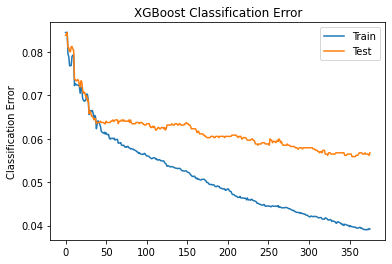

In [0]:
from matplotlib import pyplot
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [0]:
test_data_path = working_dir + r'test.csv'
test_df = pd.read_csv(test_data_path, sep=",")
print(test_df.shape)

(8576, 13)


In [0]:
# df = pd.DataFrame(data)
selected_columns = test_df[["tripid"]]
trip_ids = selected_columns.copy()
print(trip_ids.shape)

(8576, 1)


In [0]:
# import numpy as np

# test_x = test_df.drop(labels=['tripid', 'pickup_time', 'drop_time'], axis=1)
test_x = GetXY(test_df, needY=False)
# test_x = GetXY_v2(test_df, needY=False)
n = test_df.shape[0]
print(n)
n = int(n / 4)
print(n)

test_x_slice = test_x[:n]
test_x_slice = test_x_slice.copy()
print('shape of slice 1: ' + str(test_x_slice.shape))
test_pred = model.predict(test_x_slice)
test_pred = pd.DataFrame({'prediction': test_pred})
print(test_pred.shape)

test_x_slice = test_x[n:2*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 2: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

test_x_slice = test_x[2*n:3*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 3: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

test_x_slice = test_x[3*n:4*n]
test_x_slice = test_x_slice.copy()
print('shape of slice 3: ' + str(test_x_slice.shape))
test_pred_slice = model.predict(test_x_slice)
test_pred_slice = pd.DataFrame({'prediction': test_pred_slice})
test_pred = pd.concat([test_pred, test_pred_slice])
print(test_pred.shape)

8576
2144
shape of slice 1: (2144, 18)
(2144, 1)
shape of slice 2: (2144, 18)
(4288, 1)
shape of slice 3: (2144, 18)
(6432, 1)
shape of slice 3: (2144, 18)
(8576, 1)


In [0]:
trip_ids.reset_index(drop=True, inplace=True)
test_pred.reset_index(drop=True, inplace=True)
result = pd.concat([trip_ids, test_pred], axis=1)
print(trip_ids.shape)
print(trip_ids.head())
print(test_pred.shape)
print(test_pred.head())
print(result.shape)
print(result.head())

(8576, 1)
      tripid
0  213284604
1  213286352
2  213293973
3  213294622
4  213298687
(8576, 1)
   prediction
0           1
1           1
2           1
3           1
4           1
(8576, 2)
      tripid  prediction
0  213284604           1
1  213286352           1
2  213293973           1
3  213294622           1
4  213298687           1


In [0]:
pred_data_path = working_dir + r'sample_submission.csv'
print(pred_data_path)
result.to_csv(pred_data_path, index=False)

./gdrive/My Drive/Semester7/MachineLearning/MLProject/sample_submission.csv


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)